In [2]:
# I will import all needed modules here
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display
from skfeature.function.similarity_based import fisher_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold

In [3]:
Hancitor_raw_data_df = pd.read_csv('Hancitor_only_data_set.csv')
Hancitor_raw_data_df['malware'] = 1
Hancitor_raw_data_df

,tcp_tcp.checksum.status_0,tcp_tcp.urgent_pointer_0,eth_eth.dst_tree_eth.lg_0,frame_frame.marked_0,ip_ip.frag_offset_0,frame_frame.time_epoch_0,http_http.host_0,ip_ip.flags_tree_ip.flags.mf_0,ip_ip.flags_0,ip_ip.flags_tree_ip.flags.df_0,...,http_http.next_request_in_4,http_GET /0102s.bin HTTP/1.1\r\n_http.request.version_4,ip_ip.dst_4,tcp_tcp.analysis_tcp.analysis.bytes_in_flight_4,http_GET /24s.bin HTTP/1.1\r\n_http.request.uri_4,http_GET /107.bin HTTP/1.1\r\n__ws.expert__ws.expert.severity_4,frame_frame.encap_type_4,http_GET /1305s.bin HTTP/1.1\r\n__ws.expert__ws.expert.group_4,eth_eth.type_4,malware
0,2.0,0.0,0.0,0.0,0.0,1.612283e+09,16.0,0.0,2.0,1.0,...,65.0,13.0,1.479348e+08,357.0,0.0,0.0,1.0,0.0,2048.0,1
1,2.0,0.0,0.0,0.0,0.0,1.612891e+09,16.0,0.0,2.0,1.0,...,0.0,0.0,1.478519e+08,353.0,0.0,0.0,1.0,0.0,2048.0,1
2,2.0,0.0,0.0,0.0,0.0,1.616079e+09,16.0,0.0,2.0,1.0,...,105.0,0.0,1.478736e+08,343.0,0.0,0.0,1.0,0.0,2048.0,1
3,2.0,0.0,0.0,0.0,0.0,1.617722e+09,16.0,0.0,2.0,1.0,...,65.0,0.0,1.478736e+08,335.0,0.0,0.0,1.0,0.0,2048.0,1
4,2.0,0.0,0.0,0.0,0.0,1.620943e+09,16.0,0.0,2.0,1.0,...,105.0,0.0,1.480473e+08,339.0,0.0,0.0,1.0,10.0,2048.0,1
5,2.0,0.0,0.0,0.0,0.0,1.621530e+09,16.0,0.0,2.0,1.0,...,105.0,0.0,1.480473e+08,337.0,0.0,0.0,1.0,0.0,2048.0,1
6,2.0,0.0,0.0,0.0,0.0,1.621869e+09,16.0,0.0,2.0,1.0,...,105.0,0.0,1.480473e+08,337.0,179.0,0.0,1.0,0.0,2048.0,1
7,2.0,0.0,0.0,0.0,0.0,1.622560e+09,16.0,0.0,2.0,1.0,...,105.0,0.0,1.480473e+08,341.0,0.0,0.0,1.0,0.0,2048.0,1
8,2.0,0.0,0.0,0.0,0.0,1.623770e+09,16.0,0.0,2.0,1.0,...,105.0,0.0,1.479454e+08,339.0,0.0,0.0,1.0,0.0,2048.0,1
9,2.0,0.0,0.0,0.0,0.0,1.623948e+09,16.0,0.0,2.0,1.0,...,0.0,0.0,1.479454e+08,341.0,0.0,0.0,1.0,0.0,2048.0,1


In [4]:
Hancitor_noraml_raw_data_df = pd.read_csv('normal_Hancitor_only_data_set.csv')
Hancitor_noraml_raw_data_df['malware'] = 0
Hancitor_noraml_raw_data_df

,tcp_tcp.checksum.status_0,tcp_tcp.urgent_pointer_0,eth_eth.dst_tree_eth.lg_0,frame_frame.marked_0,ip_ip.frag_offset_0,frame_frame.time_epoch_0,http_http.host_0,ip_ip.flags_tree_ip.flags.mf_0,ip_ip.flags_0,ip_ip.flags_tree_ip.flags.df_0,...,http_http.next_request_in_4,http_GET /0102s.bin HTTP/1.1\r\n_http.request.version_4,ip_ip.dst_4,tcp_tcp.analysis_tcp.analysis.bytes_in_flight_4,http_GET /24s.bin HTTP/1.1\r\n_http.request.uri_4,http_GET /107.bin HTTP/1.1\r\n__ws.expert__ws.expert.severity_4,frame_frame.encap_type_4,http_GET /1305s.bin HTTP/1.1\r\n__ws.expert__ws.expert.group_4,eth_eth.type_4,malware
0,2.0,0.0,0.0,0.0,0.0,1.668627e+09,333.0,0.0,2.0,1.0,...,0.0,0.0,1.732703e+09,473.0,0.0,0.0,1.0,0.0,2048.0,0
1,2.0,0.0,0.0,0.0,0.0,1.668627e+09,367.0,0.0,2.0,1.0,...,0.0,0.0,3.770000e+02,371.0,0.0,0.0,369.0,0.0,375.0,0
2,376.0,375.0,372.0,372.0,375.0,3.700000e+02,367.0,372.0,376.0,372.0,...,0.0,0.0,3.770000e+02,0.0,0.0,0.0,0.0,0.0,0.0,0
3,2.0,0.0,0.0,0.0,0.0,1.668627e+09,382.0,0.0,2.0,1.0,...,0.0,0.0,3.770000e+02,371.0,0.0,0.0,369.0,0.0,375.0,0
4,376.0,375.0,372.0,372.0,375.0,3.700000e+02,382.0,372.0,376.0,372.0,...,0.0,0.0,3.770000e+02,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1274,2.0,0.0,0.0,0.0,0.0,1.668631e+09,2997.0,0.0,0.0,0.0,...,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0
1275,376.0,375.0,372.0,372.0,0.0,3.700000e+02,2997.0,0.0,0.0,0.0,...,0.0,0.0,0.000000e+00,371.0,0.0,0.0,369.0,0.0,375.0,0
1276,2.0,0.0,0.0,0.0,0.0,1.668631e+09,2380.0,0.0,2.0,1.0,...,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0
1277,376.0,375.0,372.0,372.0,375.0,3.700000e+02,2380.0,372.0,376.0,372.0,...,0.0,0.0,0.000000e+00,371.0,0.0,0.0,369.0,0.0,375.0,0


In [5]:
mixed_Hancitor_df = pd.concat([Hancitor_raw_data_df, Hancitor_noraml_raw_data_df])
mixed_Hancitor_df

,tcp_tcp.checksum.status_0,tcp_tcp.urgent_pointer_0,eth_eth.dst_tree_eth.lg_0,frame_frame.marked_0,ip_ip.frag_offset_0,frame_frame.time_epoch_0,http_http.host_0,ip_ip.flags_tree_ip.flags.mf_0,ip_ip.flags_0,ip_ip.flags_tree_ip.flags.df_0,...,http_http.next_request_in_4,http_GET /0102s.bin HTTP/1.1\r\n_http.request.version_4,ip_ip.dst_4,tcp_tcp.analysis_tcp.analysis.bytes_in_flight_4,http_GET /24s.bin HTTP/1.1\r\n_http.request.uri_4,http_GET /107.bin HTTP/1.1\r\n__ws.expert__ws.expert.severity_4,frame_frame.encap_type_4,http_GET /1305s.bin HTTP/1.1\r\n__ws.expert__ws.expert.group_4,eth_eth.type_4,malware
0,2.0,0.0,0.0,0.0,0.0,1.612283e+09,16.0,0.0,2.0,1.0,...,65.0,13.0,147934788.0,357.0,0.0,0.0,1.0,0.0,2048.0,1
1,2.0,0.0,0.0,0.0,0.0,1.612891e+09,16.0,0.0,2.0,1.0,...,0.0,0.0,147851923.0,353.0,0.0,0.0,1.0,0.0,2048.0,1
2,2.0,0.0,0.0,0.0,0.0,1.616079e+09,16.0,0.0,2.0,1.0,...,105.0,0.0,147873628.0,343.0,0.0,0.0,1.0,0.0,2048.0,1
3,2.0,0.0,0.0,0.0,0.0,1.617722e+09,16.0,0.0,2.0,1.0,...,65.0,0.0,147873628.0,335.0,0.0,0.0,1.0,0.0,2048.0,1
4,2.0,0.0,0.0,0.0,0.0,1.620943e+09,16.0,0.0,2.0,1.0,...,105.0,0.0,148047336.0,339.0,0.0,0.0,1.0,10.0,2048.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1274,2.0,0.0,0.0,0.0,0.0,1.668631e+09,2997.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1275,376.0,375.0,372.0,372.0,0.0,3.700000e+02,2997.0,0.0,0.0,0.0,...,0.0,0.0,0.0,371.0,0.0,0.0,369.0,0.0,375.0,0
1276,2.0,0.0,0.0,0.0,0.0,1.668631e+09,2380.0,0.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1277,376.0,375.0,372.0,372.0,375.0,3.700000e+02,2380.0,372.0,376.0,372.0,...,0.0,0.0,0.0,371.0,0.0,0.0,369.0,0.0,375.0,0


In [6]:
mixed_one_to_one_Hancitor_df = pd.concat([Hancitor_raw_data_df, Hancitor_noraml_raw_data_df.sample(n = Hancitor_raw_data_df.shape[0])])
mixed_one_to_one_Hancitor_df

,tcp_tcp.checksum.status_0,tcp_tcp.urgent_pointer_0,eth_eth.dst_tree_eth.lg_0,frame_frame.marked_0,ip_ip.frag_offset_0,frame_frame.time_epoch_0,http_http.host_0,ip_ip.flags_tree_ip.flags.mf_0,ip_ip.flags_0,ip_ip.flags_tree_ip.flags.df_0,...,http_http.next_request_in_4,http_GET /0102s.bin HTTP/1.1\r\n_http.request.version_4,ip_ip.dst_4,tcp_tcp.analysis_tcp.analysis.bytes_in_flight_4,http_GET /24s.bin HTTP/1.1\r\n_http.request.uri_4,http_GET /107.bin HTTP/1.1\r\n__ws.expert__ws.expert.severity_4,frame_frame.encap_type_4,http_GET /1305s.bin HTTP/1.1\r\n__ws.expert__ws.expert.group_4,eth_eth.type_4,malware
0,2.0,0.0,0.0,0.0,0.0,1.612283e+09,16.0,0.0,2.0,1.0,...,65.0,13.0,1.479348e+08,357.0,0.0,0.0,1.0,0.0,2048.0,1
1,2.0,0.0,0.0,0.0,0.0,1.612891e+09,16.0,0.0,2.0,1.0,...,0.0,0.0,1.478519e+08,353.0,0.0,0.0,1.0,0.0,2048.0,1
2,2.0,0.0,0.0,0.0,0.0,1.616079e+09,16.0,0.0,2.0,1.0,...,105.0,0.0,1.478736e+08,343.0,0.0,0.0,1.0,0.0,2048.0,1
3,2.0,0.0,0.0,0.0,0.0,1.617722e+09,16.0,0.0,2.0,1.0,...,65.0,0.0,1.478736e+08,335.0,0.0,0.0,1.0,0.0,2048.0,1
4,2.0,0.0,0.0,0.0,0.0,1.620943e+09,16.0,0.0,2.0,1.0,...,105.0,0.0,1.480473e+08,339.0,0.0,0.0,1.0,10.0,2048.0,1
5,2.0,0.0,0.0,0.0,0.0,1.621530e+09,16.0,0.0,2.0,1.0,...,105.0,0.0,1.480473e+08,337.0,0.0,0.0,1.0,0.0,2048.0,1
6,2.0,0.0,0.0,0.0,0.0,1.621869e+09,16.0,0.0,2.0,1.0,...,105.0,0.0,1.480473e+08,337.0,179.0,0.0,1.0,0.0,2048.0,1
7,2.0,0.0,0.0,0.0,0.0,1.622560e+09,16.0,0.0,2.0,1.0,...,105.0,0.0,1.480473e+08,341.0,0.0,0.0,1.0,0.0,2048.0,1
8,2.0,0.0,0.0,0.0,0.0,1.623770e+09,16.0,0.0,2.0,1.0,...,105.0,0.0,1.479454e+08,339.0,0.0,0.0,1.0,0.0,2048.0,1
9,2.0,0.0,0.0,0.0,0.0,1.623948e+09,16.0,0.0,2.0,1.0,...,0.0,0.0,1.479454e+08,341.0,0.0,0.0,1.0,0.0,2048.0,1


In [7]:

mixed_Hancitor_corr_df = mixed_Hancitor_df.corr()
mixed_one_to_one_Hancitor_corr_df = mixed_one_to_one_Hancitor_df.corr()

# Use corrlations to find the useful fields 

<AxesSubplot:>

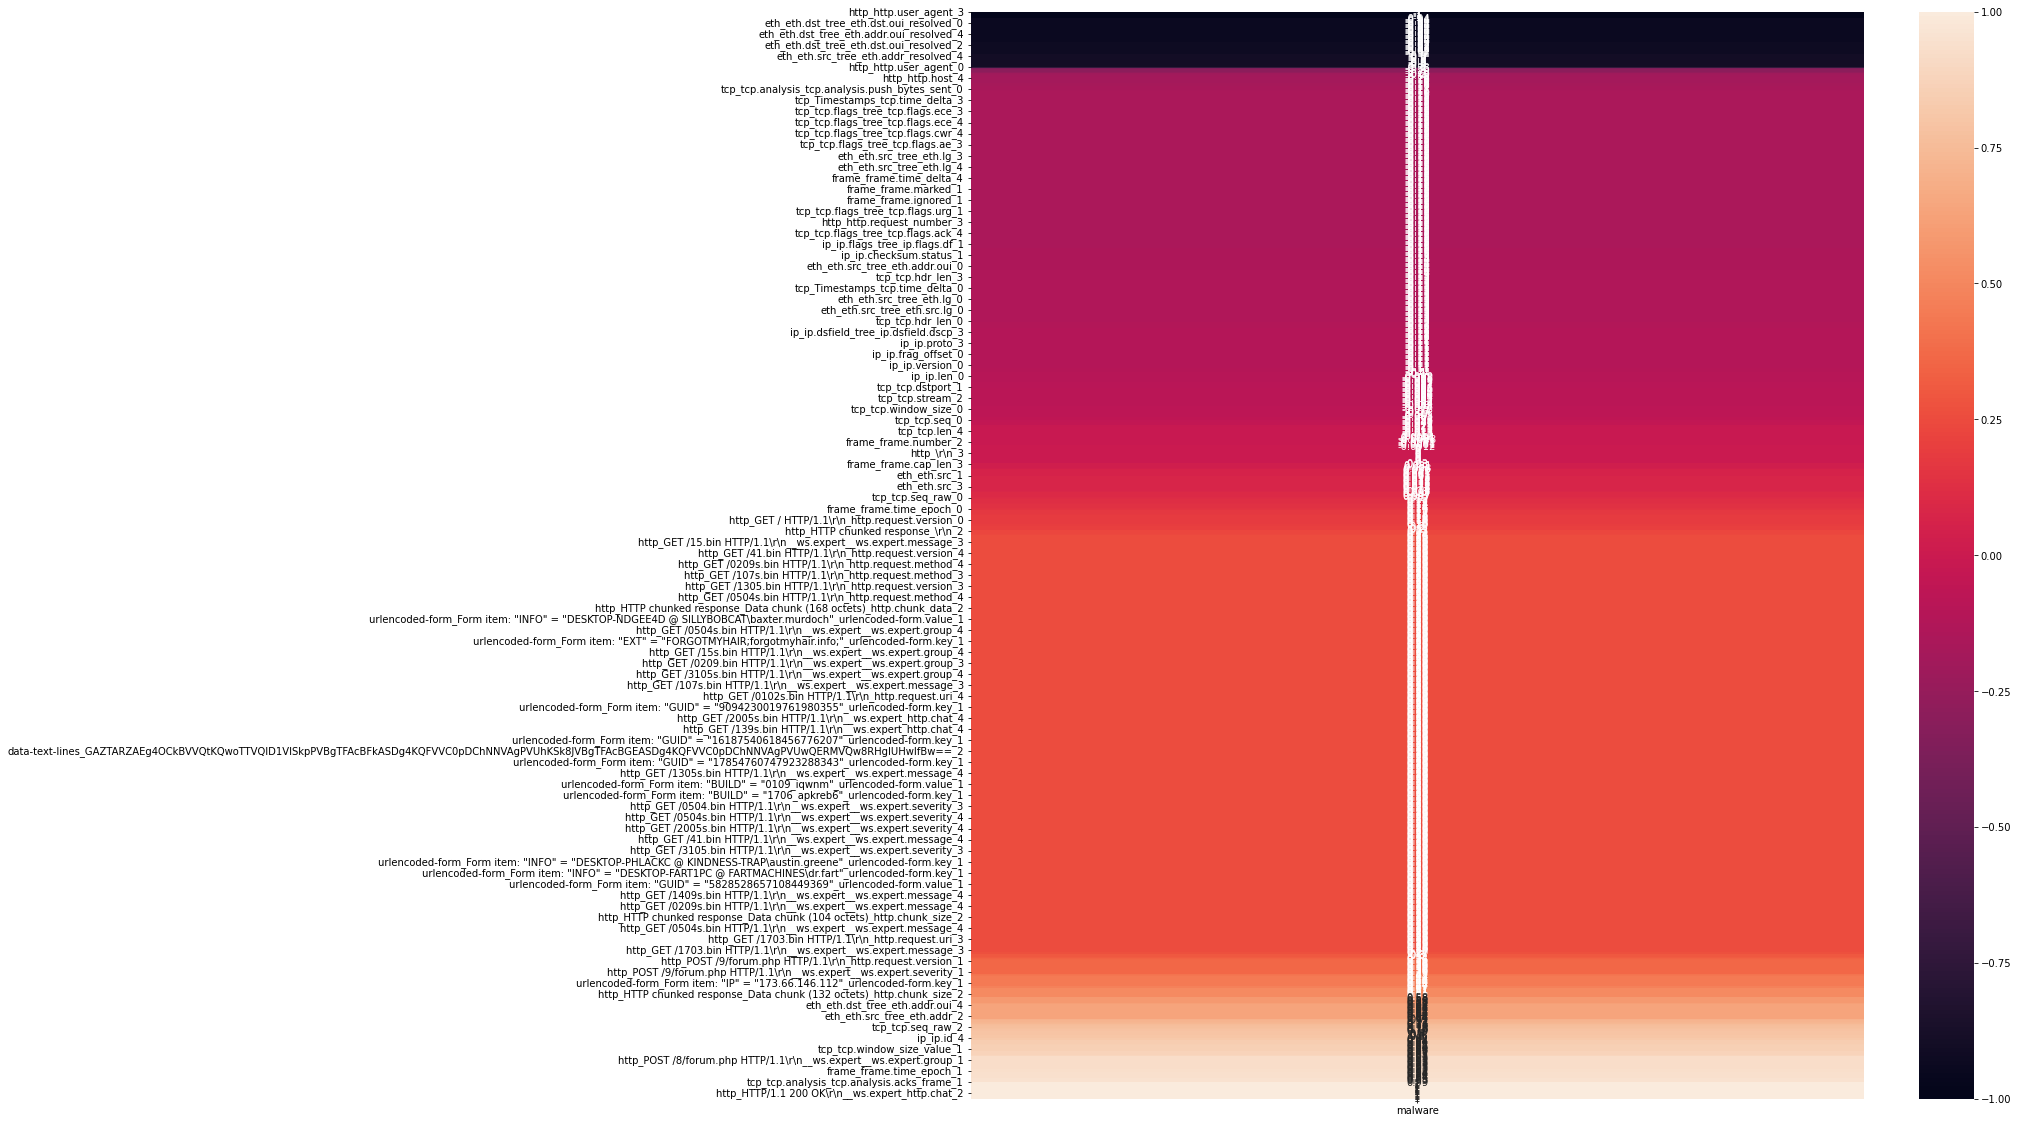

In [27]:

# the chat take too long time to build, so comment it for now
plt.figure(figsize = (20,20))
sns.heatmap(mixed_Hancitor_corr_df, annot=True)

<AxesSubplot:>

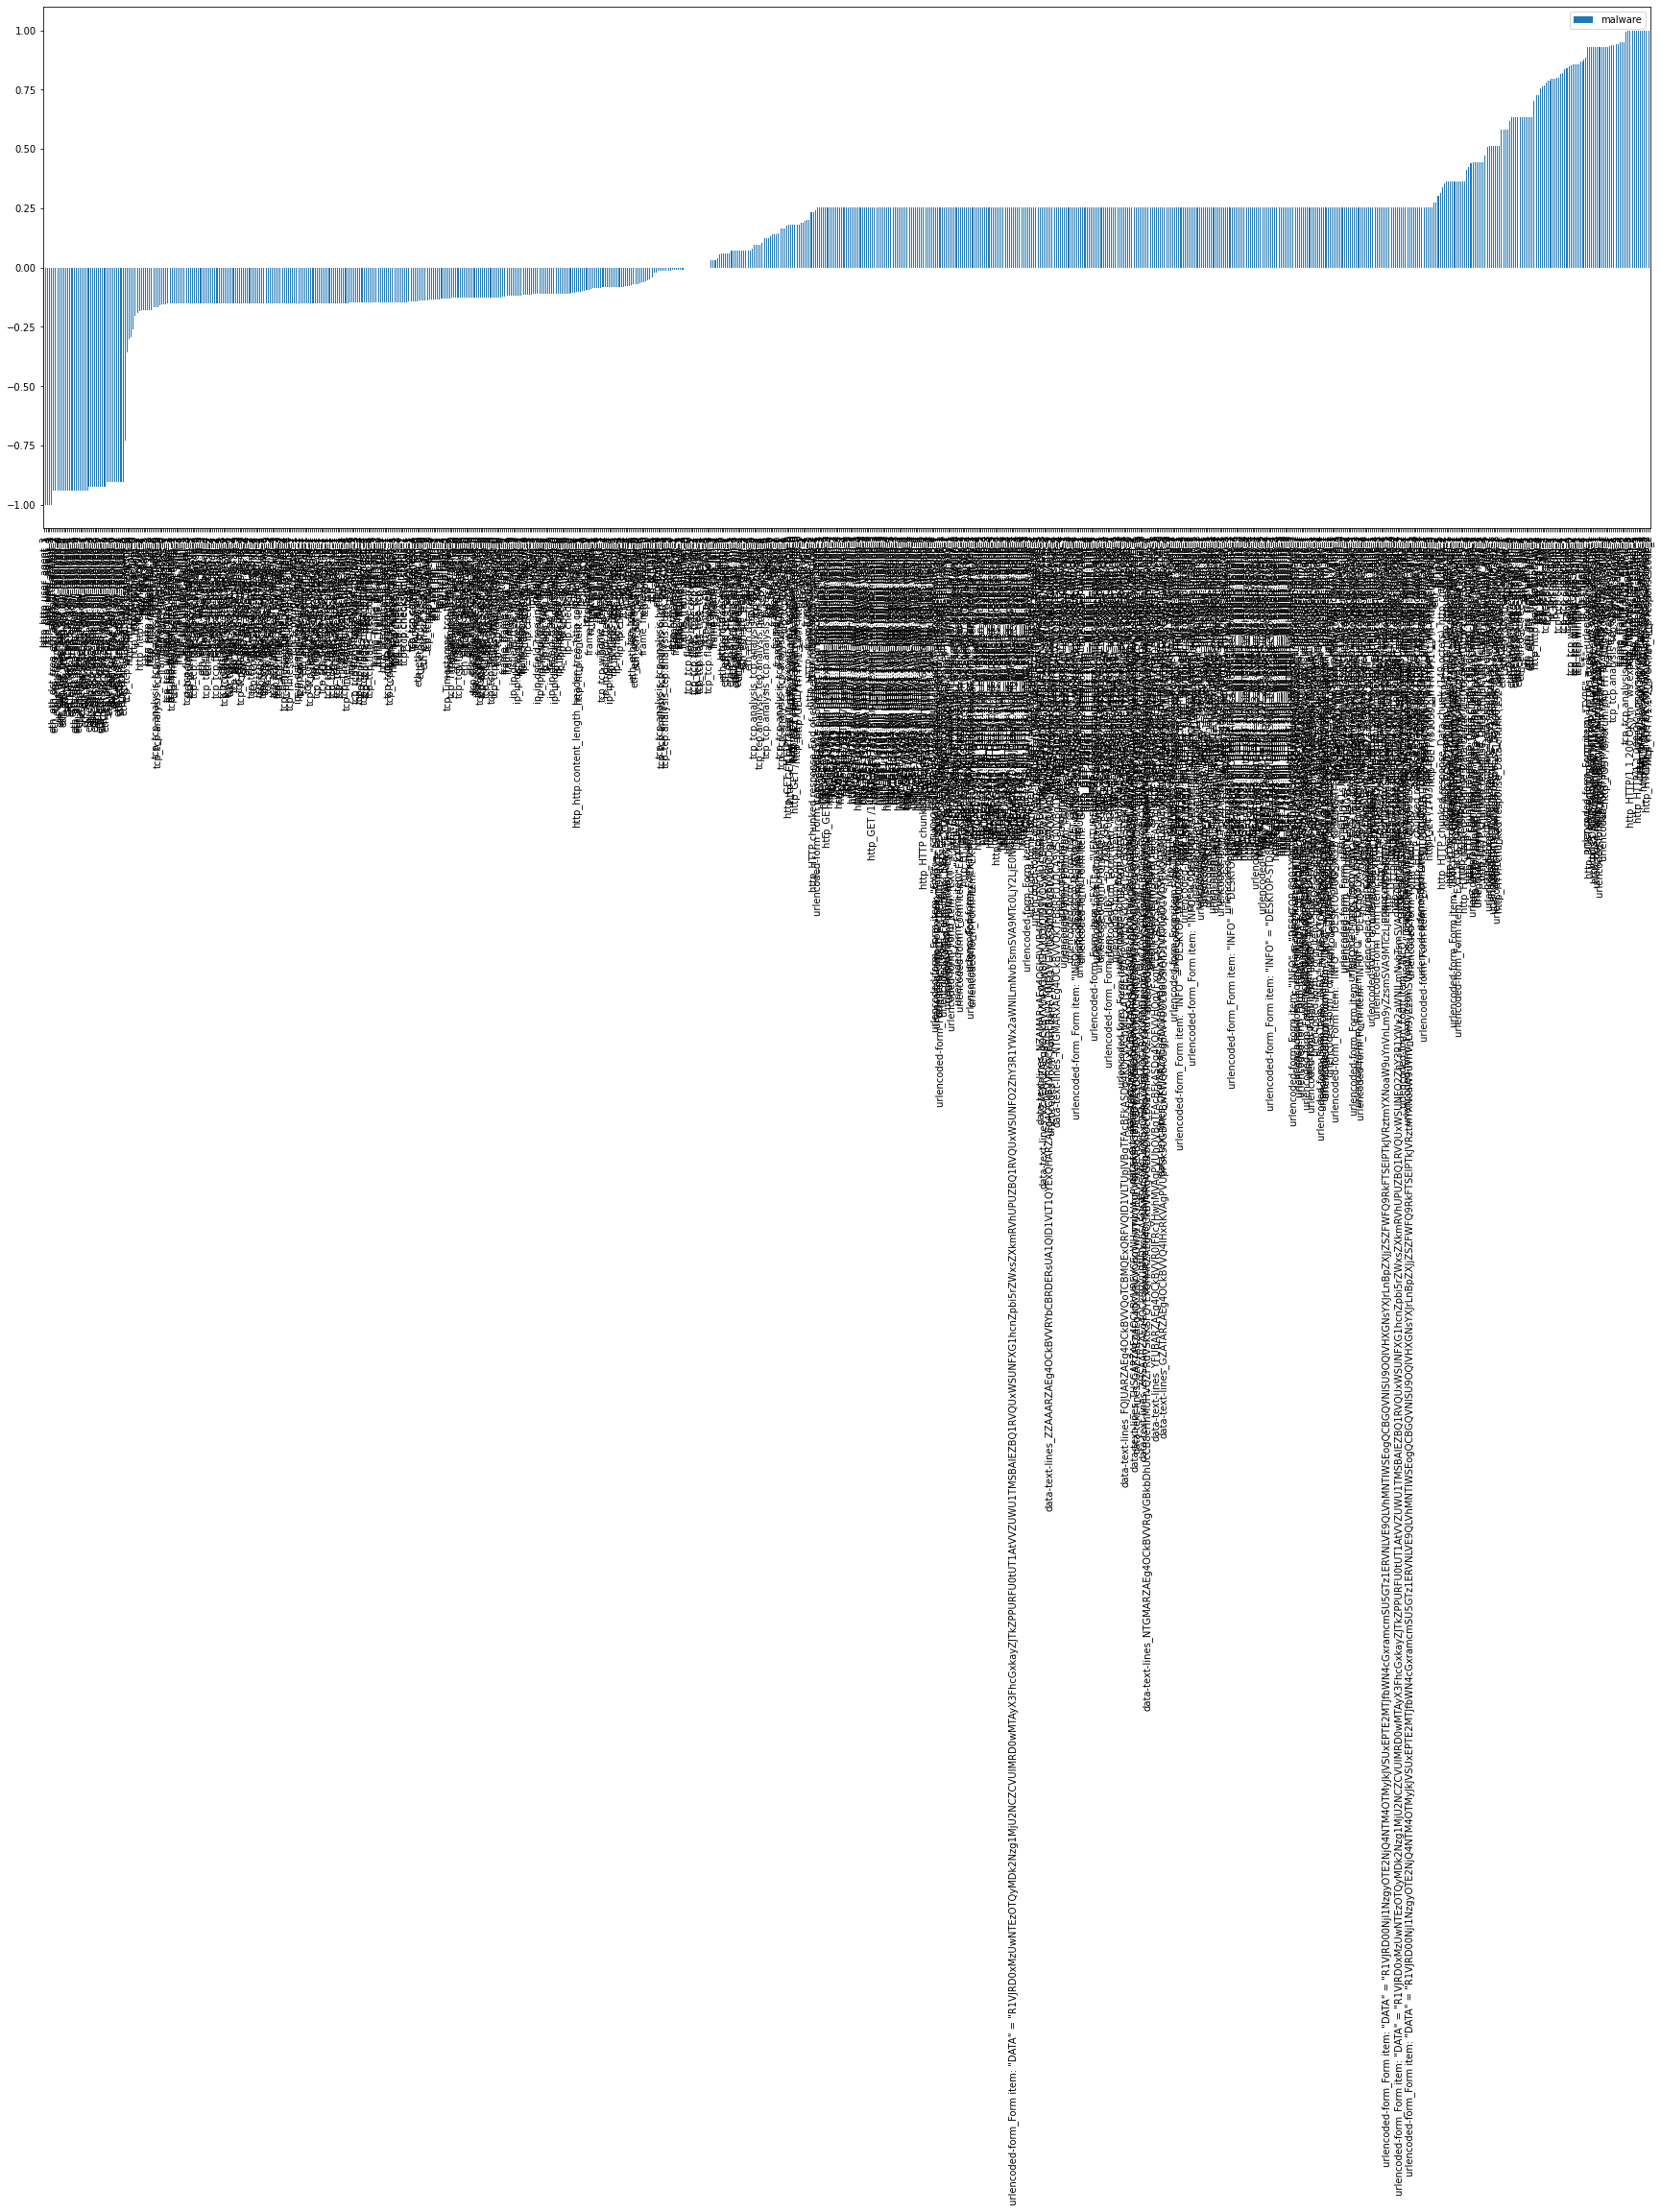

In [9]:
mixed_Hancitor_corr_df = mixed_Hancitor_corr_df.loc[['malware'],:].fillna(0).drop(['malware'], axis=1).T.sort_values(by = 'malware')
mixed_Hancitor_corr_df
mixed_Hancitor_corr_df.plot(kind="bar", figsize=(30,10))

In [10]:
filtered_mixed_Hancitor_corr_df = mixed_Hancitor_corr_df[abs(mixed_Hancitor_corr_df['malware']) > 0.5]
corr_good_fields = list(filtered_mixed_Hancitor_corr_df.T.columns) 
print(len(corr_good_fields))
corr_good_fields

136


['http_http.user_agent_3',
 'http_http.user_agent_1',
 'http_http.user_agent_4',
 'http_http.accept_3',
 'http_http.accept_4',
 'eth_eth.dst_tree_eth.addr.oui_resolved_1',
 'eth_eth.src_tree_eth.addr.oui_resolved_2',
 'eth_eth.src_tree_eth.addr_resolved_2',
 'eth_eth.dst_tree_eth.dst_resolved_0',
 'eth_eth.dst_tree_eth.dst.oui_resolved_0',
 'eth_eth.src_tree_eth.src.oui_resolved_2',
 'eth_eth.dst_tree_eth.dst.oui_resolved_4',
 'eth_eth.src_tree_eth.src_resolved_2',
 'eth_eth.dst_tree_eth.addr_resolved_0',
 'eth_eth.dst_tree_eth.dst_resolved_4',
 'eth_eth.dst_tree_eth.addr_resolved_1',
 'eth_eth.dst_tree_eth.addr_resolved_4',
 'eth_eth.dst_tree_eth.addr.oui_resolved_0',
 'eth_eth.dst_tree_eth.addr.oui_resolved_4',
 'eth_eth.dst_tree_eth.addr.oui_resolved_3',
 'eth_eth.dst_tree_eth.dst.oui_resolved_1',
 'eth_eth.dst_tree_eth.addr_resolved_3',
 'eth_eth.dst_tree_eth.dst_resolved_1',
 'eth_eth.dst_tree_eth.dst.oui_resolved_3',
 'eth_eth.dst_tree_eth.dst_resolved_3',
 'eth_eth.src_tree_eth.

<AxesSubplot:>

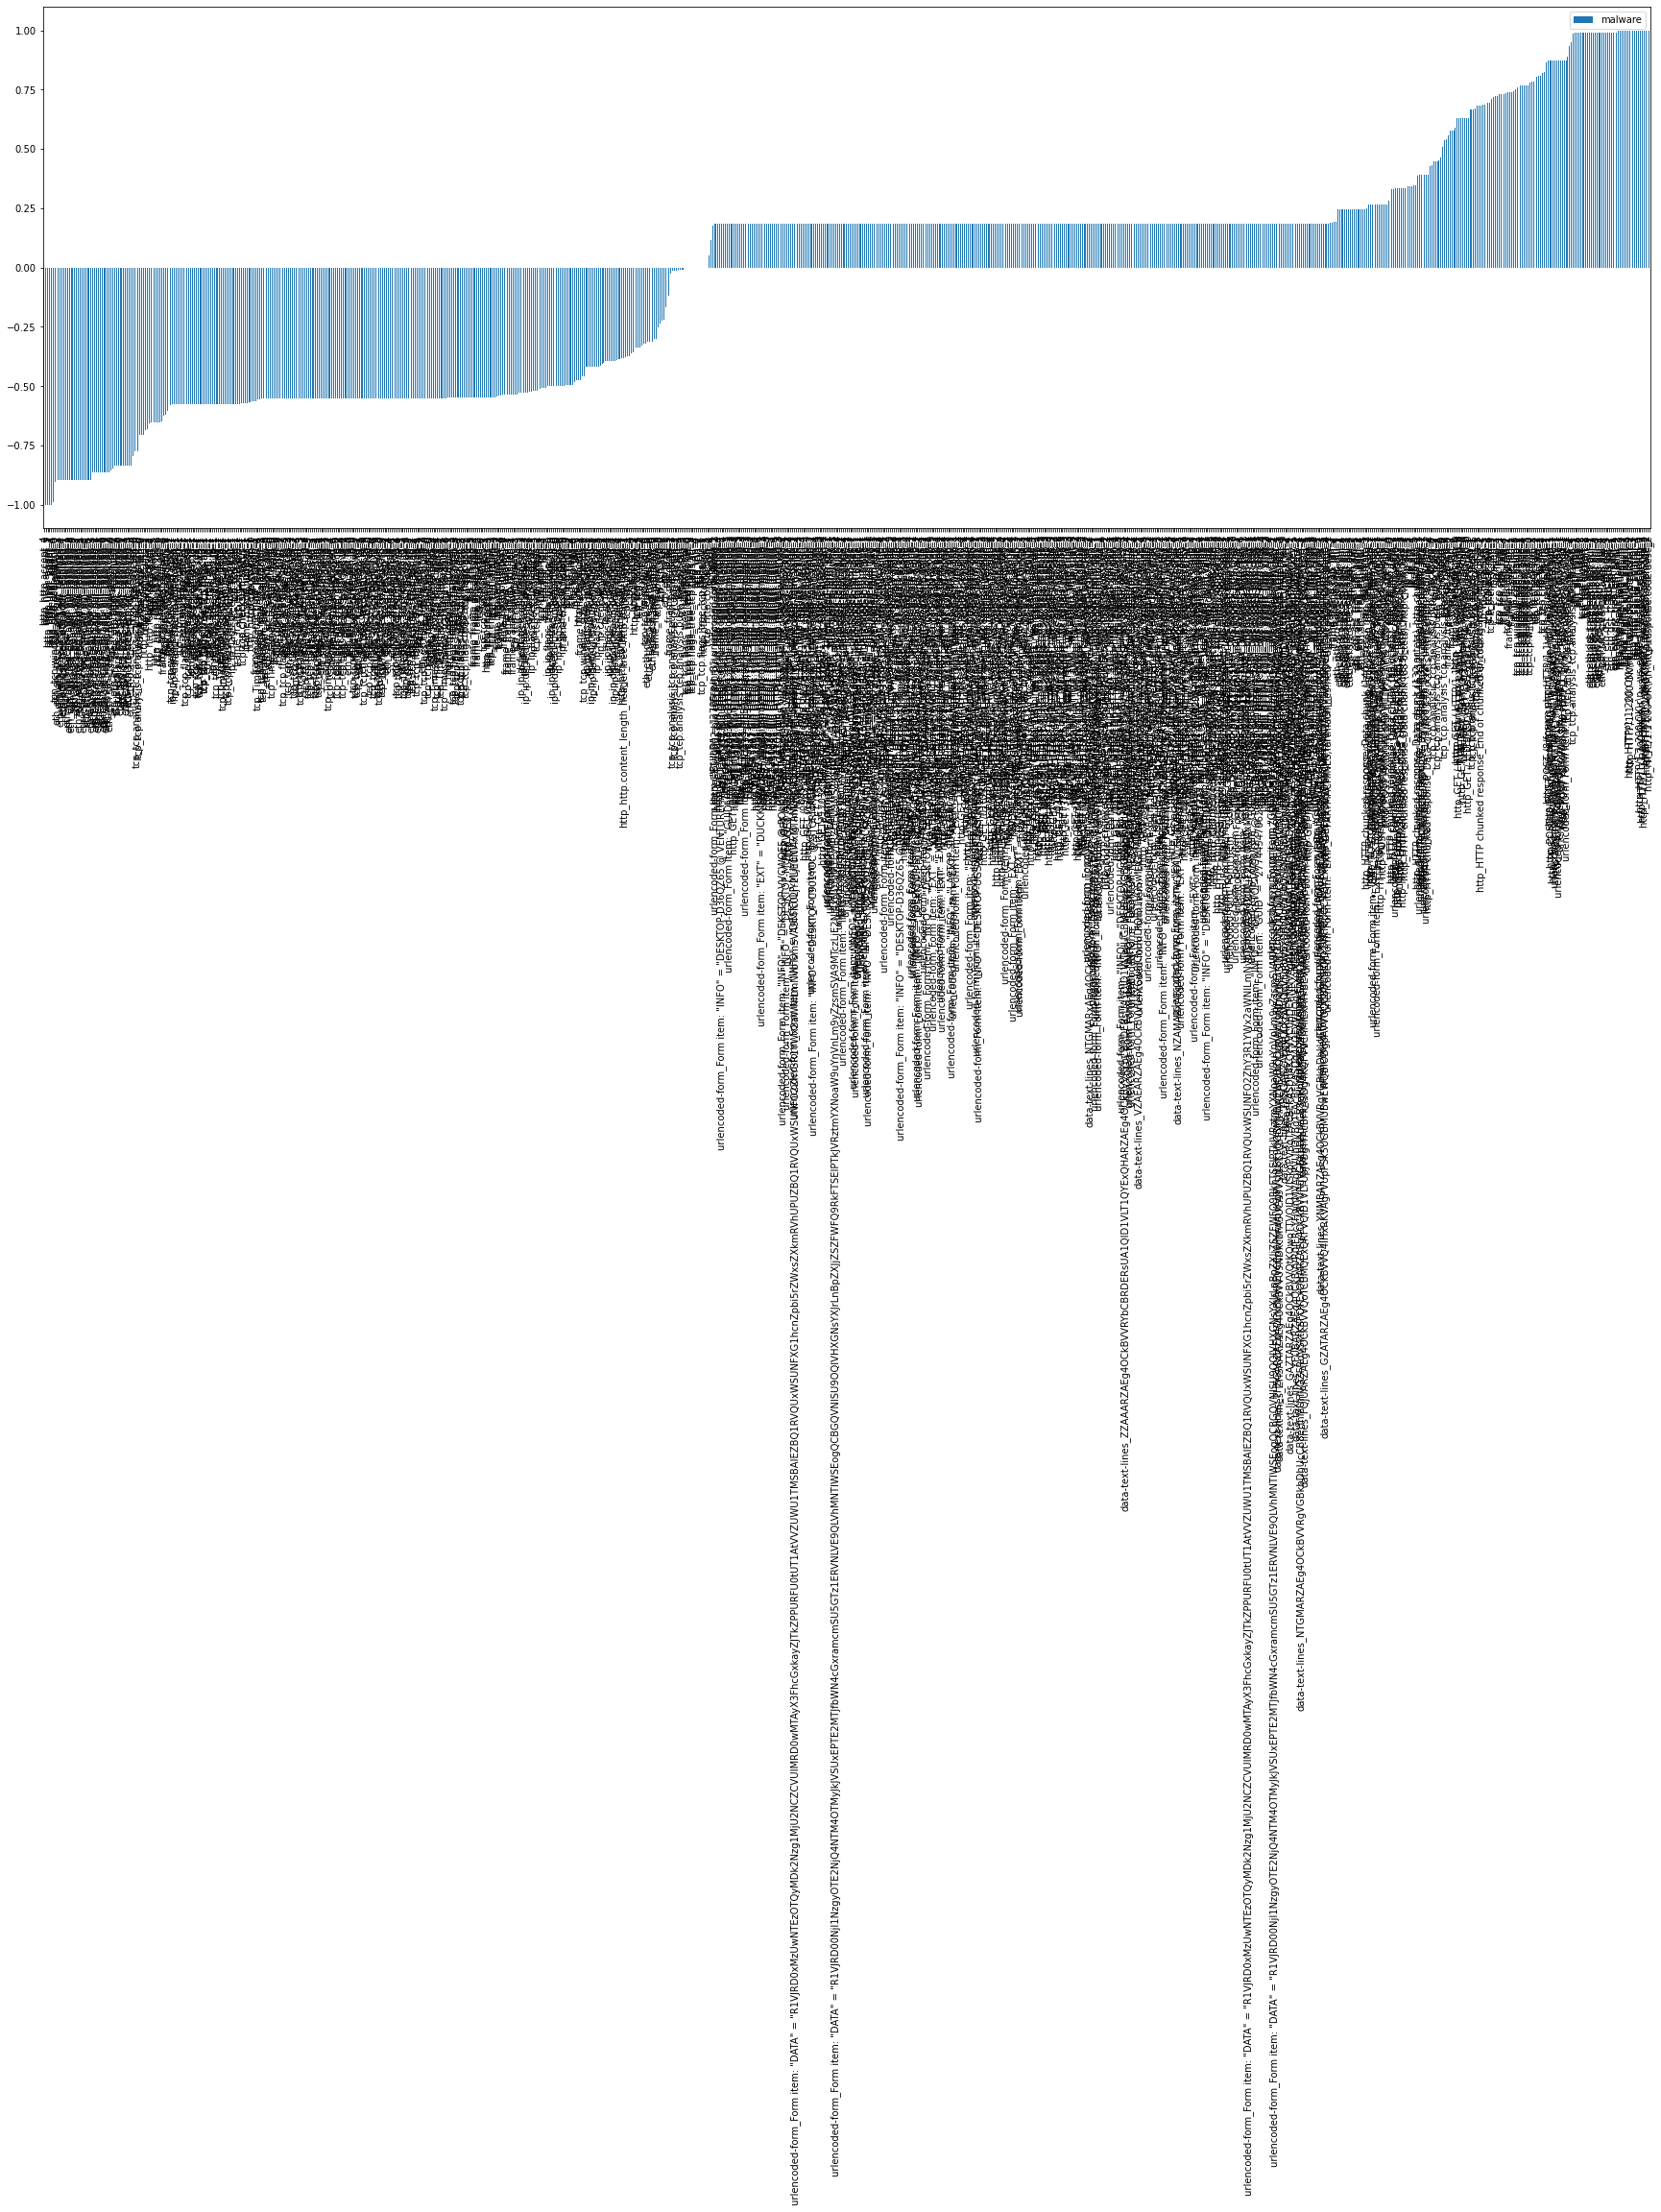

In [11]:
# one to one corr mixed_one_to_one_Hancitor_df
mixed_one_to_one_Hancitor_corr_df = mixed_one_to_one_Hancitor_corr_df.loc[['malware'],:].fillna(0).drop(['malware'], axis=1).T.sort_values(by = 'malware')
mixed_one_to_one_Hancitor_corr_df.plot(kind="bar", figsize=(30,10))

In [12]:
mixed_one_to_one_Hancitor_corr_df = mixed_one_to_one_Hancitor_corr_df[abs(mixed_one_to_one_Hancitor_corr_df['malware']) > 0.5]
corr_one_to_one_good_fields = list(mixed_one_to_one_Hancitor_corr_df.T.columns) 
print(len(corr_one_to_one_good_fields))
corr_one_to_one_good_fields

395


['http_http.accept_4',
 'http_http.accept_3',
 'http_http.user_agent_3',
 'http_http.user_agent_1',
 'http_http.user_agent_4',
 'http_http.user_agent_0',
 'tcp_tcp.window_size_scalefactor_0',
 'eth_eth.src_tree_eth.src.oui_resolved_2',
 'eth_eth.dst_tree_eth.dst_resolved_3',
 'eth_eth.dst_tree_eth.dst.oui_resolved_4',
 'eth_eth.dst_tree_eth.addr_resolved_4',
 'eth_eth.dst_tree_eth.addr_resolved_1',
 'eth_eth.dst_tree_eth.dst_resolved_1',
 'eth_eth.dst_tree_eth.dst.oui_resolved_1',
 'eth_eth.dst_tree_eth.addr.oui_resolved_0',
 'eth_eth.dst_tree_eth.addr.oui_resolved_4',
 'eth_eth.dst_tree_eth.dst_resolved_0',
 'eth_eth.src_tree_eth.src_resolved_2',
 'eth_eth.src_tree_eth.addr_resolved_2',
 'eth_eth.dst_tree_eth.addr.oui_resolved_1',
 'eth_eth.dst_tree_eth.addr_resolved_3',
 'eth_eth.dst_tree_eth.dst_resolved_4',
 'eth_eth.src_tree_eth.addr.oui_resolved_2',
 'eth_eth.dst_tree_eth.dst.oui_resolved_0',
 'eth_eth.dst_tree_eth.dst.oui_resolved_3',
 'eth_eth.dst_tree_eth.addr_resolved_0',
 'e

# Use Fisher’s Score

In [13]:

def get_train_test_data(data_df, features_list, test_size, labels_list):
    #Set up train and test data
    #features_list = np.concatenate((full_attributes_list_np,full_categories_list_np,common_fields_list,open_hour_fields_list), axis=None)
    sc = StandardScaler()
    labels_list = labels_list
    X=data_df[features_list]
    #display("Before Change",X)
    sc.fit(X)
    X = sc.transform(X)
    #display("After Change",X[:,:5])
    #display(len(X))
    y=data_df[labels_list]
    if test_size == 0:
        return X,[],y,[]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size,random_state=5)
    return X_train, X_test, y_train.to_numpy().flatten(), y_test.to_numpy().flatten()

def get_k_fold_data_set(data_df, features_list, num_splits, labels_list, shuffle=True, to_df=False):
    sc = StandardScaler()
    kf = KFold(n_splits=num_splits, shuffle=shuffle)
    train_test_set_list=[]
    X=data_df[features_list].drop(labels_list, axis=1).to_numpy()
    sc.fit(X)
    X = sc.transform(X)
    y=data_df[labels_list].to_numpy()
    for train_index, test_index in kf.split(X):
        data_train, data_test = X[train_index], X[test_index]
        label_train, label_test = y[train_index], y[test_index]
        if to_df:
            data_train=pd.DataFrame(data_train,columns=features_list)
            data_test=pd.DataFrame(data_test,columns=features_list)
        train_test_set_list.append([data_train, data_test,label_train.flatten(), label_test.flatten()])
    return train_test_set_list


In [14]:
# Do k-flod on malware record and normal record and mix them together, to make sure that trian and test both has the malware data
def k_fold_unmixed_malware_normal_record(local_malware_data_df, local_normal_data_df, features_list, num_splits, labels_list, oneToOne= False, shuffle=True, to_df=False):
    local_malware_k_fold_train_test_all_data_set_list_list = get_k_fold_data_set(local_malware_data_df, features_list, num_splits, labels_list, shuffle, to_df)
    local_normal_k_fold_train_test_all_data_set_list_list = get_k_fold_data_set(local_normal_data_df, features_list, num_splits, labels_list, shuffle, to_df)
    train_test_set_list= []
    for idx in range(len(local_malware_k_fold_train_test_all_data_set_list_list)):
        local_train_test_record = []
        if oneToOne:
            malware_train_len = len(local_malware_k_fold_train_test_all_data_set_list_list[idx][0])
            malware_test_len = len(local_malware_k_fold_train_test_all_data_set_list_list[idx][1])
            local_normal_k_fold_train_test_all_data_set_list_list[idx][0] = local_normal_k_fold_train_test_all_data_set_list_list[idx][0][: malware_train_len]
            local_normal_k_fold_train_test_all_data_set_list_list[idx][1] = local_normal_k_fold_train_test_all_data_set_list_list[idx][1][: malware_test_len]
            local_normal_k_fold_train_test_all_data_set_list_list[idx][2] = local_normal_k_fold_train_test_all_data_set_list_list[idx][2][: malware_train_len]
            local_normal_k_fold_train_test_all_data_set_list_list[idx][3] = local_normal_k_fold_train_test_all_data_set_list_list[idx][3][: malware_test_len]

        for record_idx in range(4):
            local_train_test_record.append(np.concatenate((local_malware_k_fold_train_test_all_data_set_list_list[idx][record_idx], local_normal_k_fold_train_test_all_data_set_list_list[idx][record_idx])))
        train_random_idx = np.random.permutation(len(local_train_test_record[0]))
        test_random_idx = np.random.permutation(len(local_train_test_record[1]))
        local_train_test_record[0] = local_train_test_record[0][train_random_idx]
        local_train_test_record[1] = local_train_test_record[1][test_random_idx]
        local_train_test_record[2] = local_train_test_record[2][train_random_idx]
        local_train_test_record[3] = local_train_test_record[3][test_random_idx]
        train_test_set_list.append(local_train_test_record)
    return train_test_set_list


In [15]:
# mixed_Hancitor_df mixed mixed_one_to_one_Hancitor_df
k_fold_train_test_all_data_set_list_list = get_k_fold_data_set(mixed_one_to_one_Hancitor_df, list(mixed_one_to_one_Hancitor_df.columns), 5, ['malware'])
len(k_fold_train_test_all_data_set_list_list)

5

c:\Users\Chip_cat\AppData\Local\Programs\Python\Python39\lib\site-packages\skfeature\function\similarity_based\fisher_score.py:59: RuntimeWarning: divide by zero encountered in true_divide
  score = 1.0 / lap_score - 1


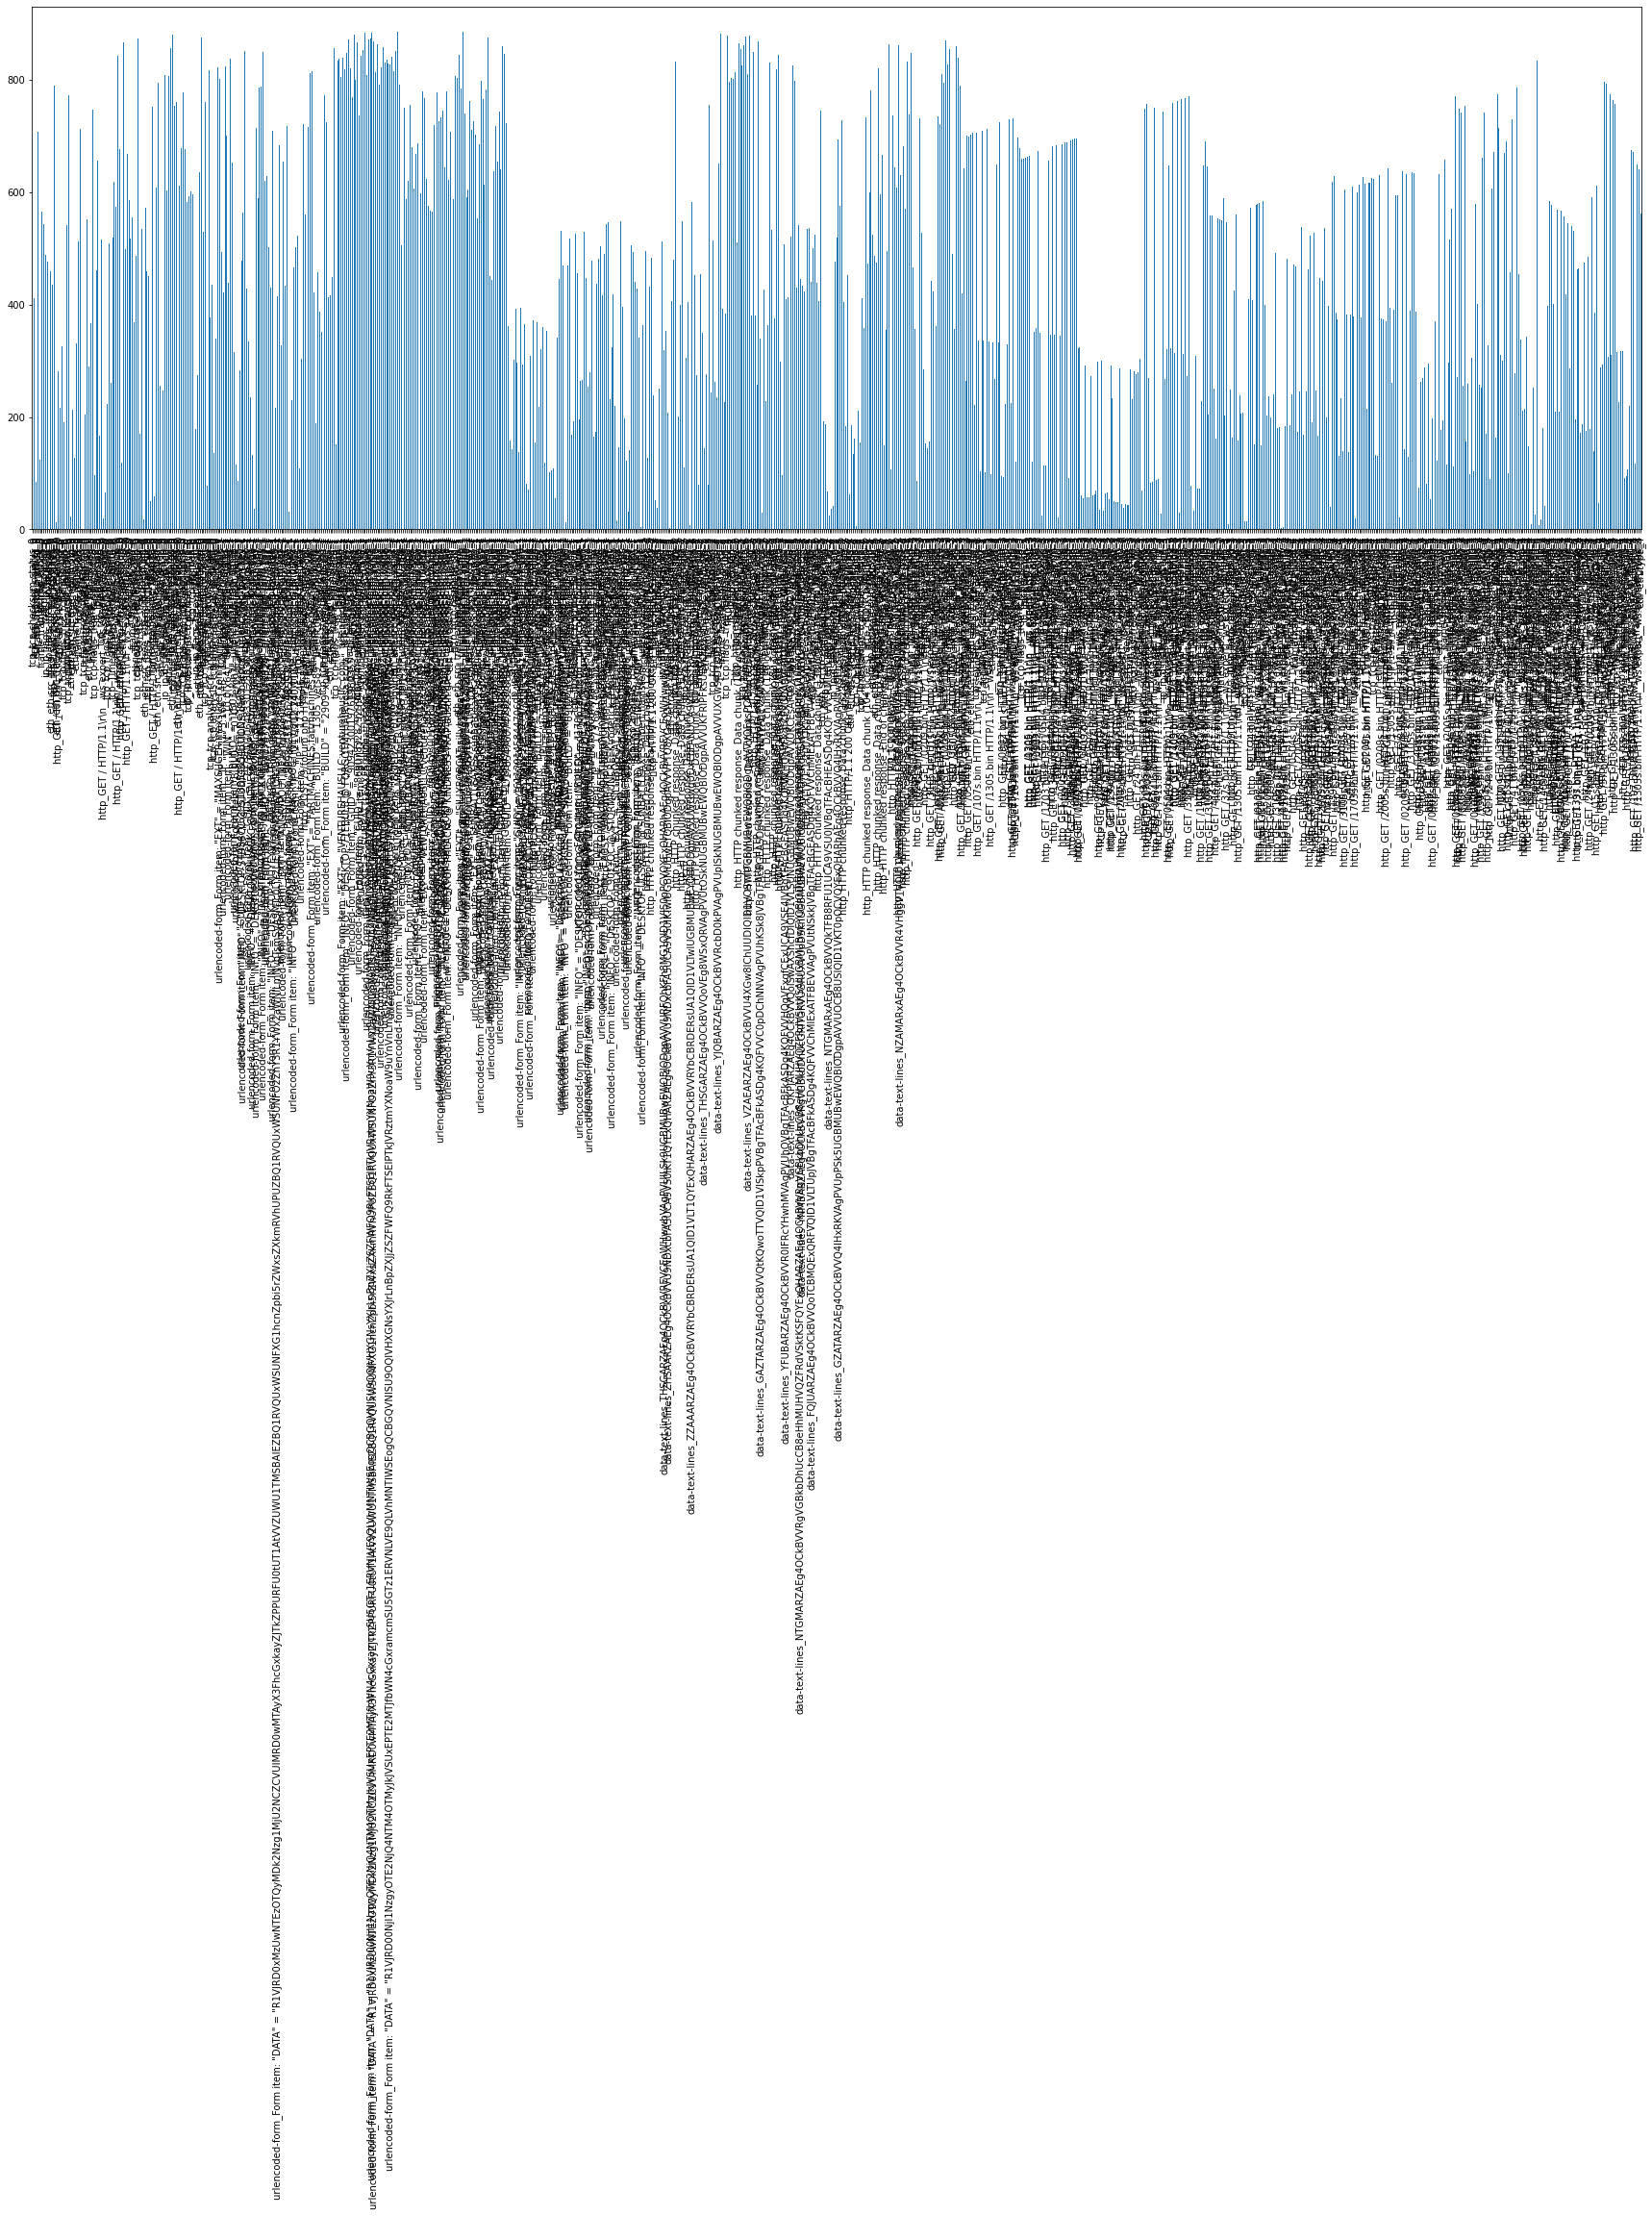

In [16]:
# Calculating scores 
score = fisher_score.fisher_score(k_fold_train_test_all_data_set_list_list[0][0], k_fold_train_test_all_data_set_list_list[0][2])
featrue_importances = pd.Series(score, mixed_one_to_one_Hancitor_df.columns[0:len(mixed_one_to_one_Hancitor_df.columns)-1])
featrue_importances.plot(kind="bar", figsize=(30,10))
plt.show()

In [17]:
featrue_importances_df = pd.DataFrame({'field':featrue_importances.index, 'score': featrue_importances.values})
featrue_importances_df = featrue_importances_df.sort_values(by='score', ascending=False)
featrue_importances_df

,field,score
237,"urlencoded-form_Form item: ""BUILD"" = ""1506_nec...",886
201,tcp_tcp.stream_1,885
187,"urlencoded-form_Form item: ""DATA"" = ""R1VJRD00N...",884
183,tcp_tcp.ack_1,883
379,tcp_tcp.nxtseq_2,882
...,...,...
689,http_GET /1409s.bin HTTP/1.1\r\n__ws.expert__w...,4
688,tcp_tcp.urgent_pointer_4,3
351,ip_ip.flags_tree_ip.flags.df_2,2
710,tcp_tcp.flags_4,1


In [18]:
fisher_rank = fisher_score.fisher_score(k_fold_train_test_all_data_set_list_list[0][0], k_fold_train_test_all_data_set_list_list[0][2], mode='rank')
fisher_rank

c:\Users\Chip_cat\AppData\Local\Programs\Python\Python39\lib\site-packages\skfeature\function\similarity_based\fisher_score.py:59: RuntimeWarning: divide by zero encountered in true_divide
  score = 1.0 / lap_score - 1


array([484, 412,  85, 708, 124, 565, 544, 488, 476, 472, 459, 436, 790,
        12, 282, 217, 326, 190, 389, 541, 773,  23, 213, 128, 331, 513,
       712, 403,   0, 204, 551, 290, 367, 747,  97, 461, 656, 166, 515,
        19,  66, 223, 509, 261, 519, 619, 574, 843, 677, 118, 866, 498,
       668, 586, 517, 556, 369, 487, 873, 170, 534,  18, 573, 460, 451,
        51, 752,  59, 608, 794, 255, 222, 248, 809, 603, 806, 857, 880,
       753, 760, 602, 611, 679, 778, 676, 582, 593, 601, 596, 125, 178,
       274, 636, 876, 530, 761,  78, 817, 377, 435, 136, 340, 823, 802,
       494, 422, 824, 700, 438, 838, 652, 316, 115,  86, 283, 479, 563,
       851, 428, 335, 236, 132,  37, 714, 589, 786, 788, 849, 620, 629,
       502, 431, 709,  11, 216, 415, 683, 328, 655, 434, 718,  31, 489,
       230, 466, 503, 522, 109, 304, 721, 561, 555, 716, 812, 816, 421,
       189, 458, 388, 352, 146, 772, 725, 414, 417, 449, 856, 152, 834,
       837, 805, 839, 819, 847, 872, 820, 769, 881, 800, 867, 73

# Start to do SVM training

In [19]:
from sklearn import svm
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report, mean_squared_error

In [20]:
kernel_list=['rbf', 'poly', 'sigmoid']
param_grid = {'C': [1, 10, 25, 50, 100], 'gamma': [0.1, 0.05, 0.01,0.001],'kernel': ['linear','rbf', 'poly', 'sigmoid'], 'degree':[3,9]}

In [21]:
def get_rt_model_score(model, train_test_data_set_list, allow_log=True):
    X,x,Y,y = train_test_data_set_list
    score_message_dict={}
    y_pred=model.predict(x)
    x_pred=model.predict(X)
    score_message_dict['accuracy_score'] = accuracy_score(y, y_pred)
    score_message_dict['precision_score'] = precision_score(y, y_pred,average='weighted')
    score_message_dict['recall_score'] = recall_score(y,y_pred,average='weighted')
    score_message_dict['f1_score'] = f1_score(y,y_pred,average='weighted')
    score_message_dict['train_rmse'] = np.sqrt(mean_squared_error(Y, x_pred))
    score_message_dict['test_rmse'] = np.sqrt(mean_squared_error(y, y_pred))

    if allow_log:
        print("Accuracy for Train set:",accuracy_score(Y, x_pred))
        print('accuracy_score: %.3f' % score_message_dict['accuracy_score'])
        print('precision_score: %.3f' % score_message_dict['precision_score'])
        print('recall_score: %.3f' % score_message_dict['recall_score'])
        print('f1_score: %.3f' % score_message_dict['f1_score'])
        print('train_rmse: %.3f' % score_message_dict['train_rmse'])
        print('test_rmse: %.3f' % score_message_dict['test_rmse'])
        print()

    return score_message_dict

def get_score(result_list, y, allow_log=True):
    score_message_dict={}
    score_message_dict['accuracy_score'] = accuracy_score(y, result_list)
    score_message_dict['precision_score'] = precision_score(y, result_list,average='weighted')
    score_message_dict['recall_score'] = recall_score(y,result_list,average='weighted')
    score_message_dict['f1_score'] = f1_score(y,result_list,average='weighted')
    score_message_dict['test_rmse'] = np.sqrt(mean_squared_error(y, result_list))

    if allow_log:
        print('accuracy_score: %.3f' % score_message_dict['accuracy_score'])
        print('precision_score: %.3f' % score_message_dict['precision_score'])
        print('recall_score: %.3f' % score_message_dict['recall_score'])
        print('f1_score: %.3f' % score_message_dict['f1_score'])
        print('test_rmse: %.3f' % score_message_dict['test_rmse'])
        print()

    return score_message_dict

In [22]:
def train_SVM(model,train_test_data_set_list):
    X,x,Y,y = train_test_data_set_list
    model.fit(X,Y)
    return model

### Let me start with Linear Kernel 

In [23]:
# get_k_fold_data_set(mixed_Hancitor_df, list(mixed_Hancitor_df.columns), 5, ['malware'])
train_test_data_set_list = list(get_train_test_data(mixed_one_to_one_Hancitor_df, list(mixed_one_to_one_Hancitor_df.columns), 0.2, ['malware']))
linear_SVM_clf = svm.SVC(kernel='linear')
linear_SVM_clf = train_SVM(linear_SVM_clf,train_test_data_set_list)
get_rt_model_score(linear_SVM_clf, train_test_data_set_list)

Accuracy for Train set: 1.0
accuracy_score: 1.000
precision_score: 1.000
recall_score: 1.000
f1_score: 1.000
train_rmse: 0.000
test_rmse: 0.000



{'accuracy_score': 1.0,
 'precision_score': 1.0,
 'recall_score': 1.0,
 'f1_score': 1.0,
 'train_rmse': 0.0,
 'test_rmse': 0.0}

In [24]:
# with K fold k=5
score_list = []
for train_test_data_list in k_fold_train_test_all_data_set_list_list:
    linear_SVM_clf = svm.SVC(kernel='linear')
    linear_SVM_clf = train_SVM(linear_SVM_clf,train_test_data_list)
    score_list.append(get_rt_model_score(linear_SVM_clf, train_test_data_list))

Accuracy for Train set: 1.0
accuracy_score: 1.000
precision_score: 1.000
recall_score: 1.000
f1_score: 1.000
train_rmse: 0.000
test_rmse: 0.000

Accuracy for Train set: 1.0
accuracy_score: 1.000
precision_score: 1.000
recall_score: 1.000
f1_score: 1.000
train_rmse: 0.000
test_rmse: 0.000

Accuracy for Train set: 1.0
accuracy_score: 1.000
precision_score: 1.000
recall_score: 1.000
f1_score: 1.000
train_rmse: 0.000
test_rmse: 0.000

Accuracy for Train set: 1.0
accuracy_score: 1.000
precision_score: 1.000
recall_score: 1.000
f1_score: 1.000
train_rmse: 0.000
test_rmse: 0.000

Accuracy for Train set: 1.0
accuracy_score: 1.000
precision_score: 1.000
recall_score: 1.000
f1_score: 1.000
train_rmse: 0.000
test_rmse: 0.000



# Free Space

In [25]:
for t in k_fold_train_test_all_data_set_list_list[0][0]:
    print(t[84])

1.1847845973158282
1.1847845973158282
1.1847845973158282
1.1847845973158282
1.1847845973158282
1.1847845973158282
1.1847845973158282
1.1847845973158282
-0.8347214403952904
1.1847845973158282
1.1847845973158282
-0.8347214403952904
1.1847845973158282
1.1847845973158282
1.1847845973158282
1.1847845973158282
1.1847845973158282
1.1847845973158282
1.1847845973158282
-0.8347214403952904
-0.8347214403952904
1.1847845973158282
1.1847845973158282
-0.8347214403952904
-0.8346588307306531
-0.8550382765701213
-0.8667775886896307
-0.8550382765701213
-0.834564916233697
-0.8346588307306531
-0.8346901355629718
-0.8550382765701213
-0.8347214403952904
-0.8550382765701213
-0.8550382765701213
-0.8550382765701213
-0.8346588307306531
-0.8550382765701213
-0.8550382765701213
-0.8550382765701213
-0.8507182097101419
-0.8346588307306531
-0.8507182097101419
-0.8346588307306531
-0.8550382765701213
-0.8550382765701213
-0.8550382765701213
-0.8507182097101419


In [26]:
k_fold_train_test_all_data_set_list_list[0][2]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0], dtype=int64)

In [70]:
#IcedId_raw_data_df IcedId_noraml_raw_data_df
for idx in range(len(list(IcedId_noraml_raw_data_df.columns))):
    if list(IcedId_raw_data_df.columns)[idx] == 'IcedIdCookie_0':
        print(idx)

84
